In [1]:
import pandas as pd
import random
from sdv.multi_table import HMASynthesizer
from sdv.metadata import MultiTableMetadata
from table_evaluator import TableEvaluator
from sdmetrics.reports.single_table import QualityReport
#from sdmetrics.reports.multi_table import QualityReport
from ydata_profiling import ProfileReport

IPython not installed.


/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Step 1: Generate Sample Data
random.seed(42)

In [3]:
customers = pd.read_csv('../../Datasets/customers.csv')
orders = pd.read_csv('../../Datasets/orders.csv')
payments = pd.read_csv('../../Datasets/payments.csv')

In [4]:
customers.head()

,customer_id,name,age,country
0,C1,Mark Freeman,56,France
1,C2,Teresa Johnson,69,USA
2,C3,Megan Farrell,46,USA
3,C4,Patricia Kirk,32,USA
4,C5,Russell Krause,60,USA


In [5]:
orders.head()

,order_id,customer_id,product,amount
0,O1,C2,Monitor,1693
1,O2,C2,Laptop,54
2,O3,C92,Headphones,1176
3,O4,C54,Laptop,1269
4,O5,C87,Headphones,823


In [6]:
payments.head()

,payment_id,order_id,payment_method,status
0,P1,O19,Credit Card,Pending
1,P2,O58,Credit Card,Paid
2,P3,O96,Bitcoin,Paid
3,P4,O1,Bank Transfer,Paid
4,P5,O69,Credit Card,Failed


In [7]:
metadata = MultiTableMetadata()
metadata.detect_from_dataframes({"customers": customers, "orders": orders, "payments":payments})

metadata.update_column("customers", "customer_id", sdtype="id")
metadata.update_column("orders", "order_id", sdtype="id")
metadata.update_column("payments", "payment_id", sdtype="id")

metadata.update_column("orders", "customer_id", sdtype="id")
metadata.update_column("payments", "order_id", sdtype="id")

In [8]:
print(metadata.to_dict())

{'tables': {'customers': {'columns': {'customer_id': {'sdtype': 'id'}, 'name': {'sdtype': 'unknown', 'pii': True}, 'age': {'sdtype': 'numerical'}, 'country': {'sdtype': 'categorical'}}, 'primary_key': 'customer_id'}, 'orders': {'columns': {'order_id': {'sdtype': 'id'}, 'customer_id': {'sdtype': 'id'}, 'product': {'sdtype': 'categorical'}, 'amount': {'sdtype': 'numerical'}}, 'primary_key': 'order_id'}, 'payments': {'columns': {'payment_id': {'sdtype': 'id'}, 'order_id': {'sdtype': 'id'}, 'payment_method': {'sdtype': 'categorical'}, 'status': {'sdtype': 'categorical'}}, 'primary_key': 'payment_id'}}, 'relationships': [{'parent_table_name': 'customers', 'child_table_name': 'orders', 'parent_primary_key': 'customer_id', 'child_foreign_key': 'customer_id'}, {'parent_table_name': 'orders', 'child_table_name': 'payments', 'parent_primary_key': 'order_id', 'child_foreign_key': 'order_id'}], 'METADATA_SPEC_VERSION': 'MULTI_TABLE_V1'}


In [9]:
# Step 3: Train HMA1 Model
synthesizer = HMASynthesizer(metadata)
synthesizer.fit({"customers": customers, "orders": orders, "payments": payments})

# Step 4: Generate Synthetic Data
synthetic_data = synthesizer.sample()

/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/sdv/multi_table/base.py:109: FutureWarning: The 'MultiTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/sdv/multi_table/base.py:101: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Preprocess Tables: 100%|██████████| 3/3 [00:00<00:00, 72.67it/s]



Learning relationships:


(1/2) Tables 'orders' and 'payments' ('order_id'): 100%|██████████| 65/65 [00:00<00:00, 84.50it/s]
(2/2) Tables 'customers' and 'orders' ('customer_id'): 100%|██████████| 59/59 [00:01<00:00, 57.14it/s]


Modeling Tables: 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


In [10]:
# Step 5: Define Evaluation Function
def evaluate_synthetic_data(real_data, synthetic_data, metadata, dataset_name="Dataset"):
    print(f"\n--- Evaluating {dataset_name} ---")
    
    # TableEvaluator - Visual Evaluation
    print("\nTableEvaluator Results:")
    evaluator = TableEvaluator(real_data, synthetic_data)
    evaluator.visual_evaluation()
    evaluator.evaluate(target_col=real_data.columns[1])  # Adjust target column
    
    # YData Profiling - Generate Comparison Report
    print("\nGenerating Profiling Report...")
    real_profile = ProfileReport(real_data, title="Real Data Report", explorative=True)
    synthetic_profile = ProfileReport(synthetic_data, title="Synthetic Data Report", explorative=True)
    real_profile.to_file(f"real_data_{dataset_name}.html")
    synthetic_profile.to_file(f"synthetic_data_{dataset_name}.html")
    print(f"Profiling reports saved: real_data_{dataset_name}.html, synthetic_data_{dataset_name}.html")

    # # SDMetrics - Quality Report
    # print("\nSDMetrics Quality Report:")
    # report = QualityReport()
    # report.generate(real_data, synthetic_data, metadata.to_dict())
    # report.get_score()
    # report.get_details()
    



--- Evaluating Orders ---

TableEvaluator Results:


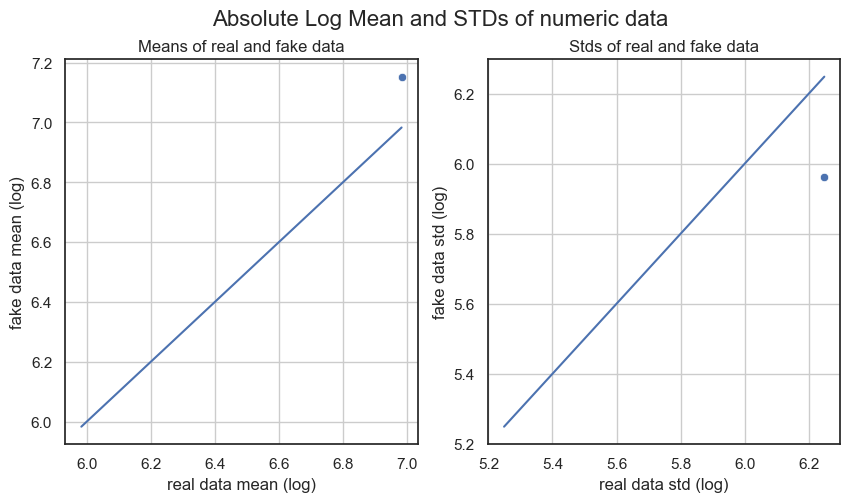

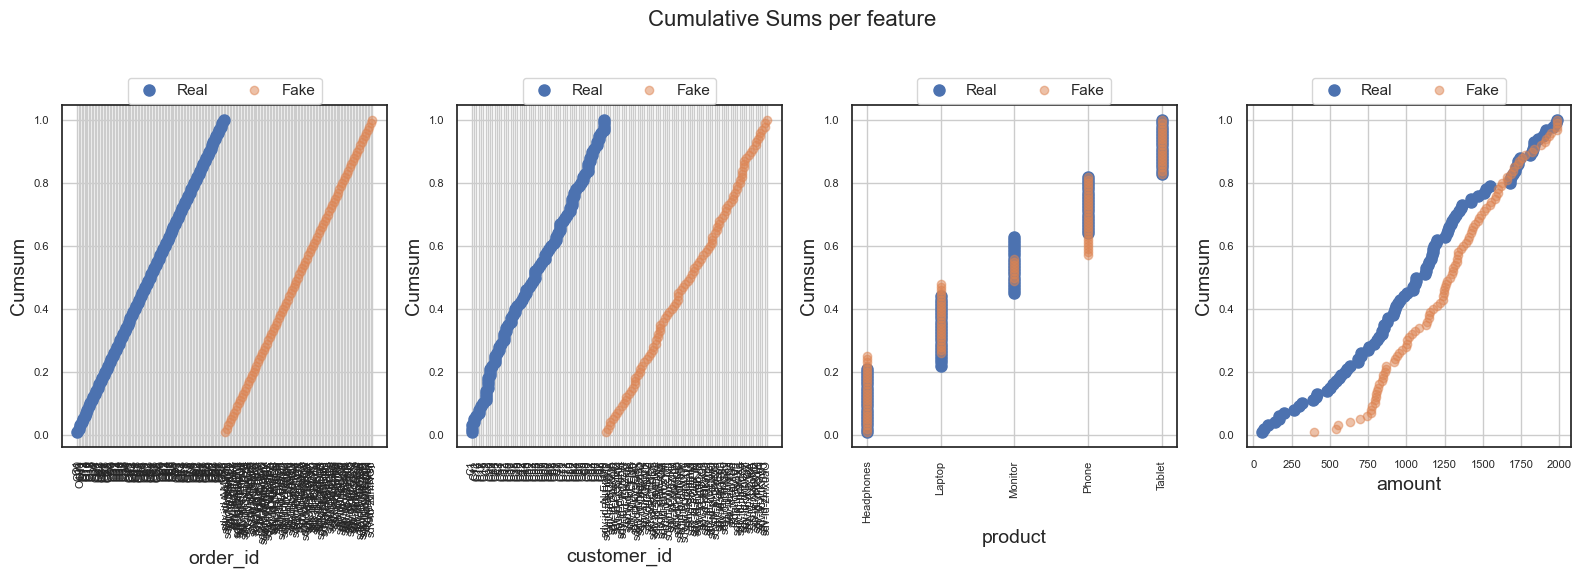

/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


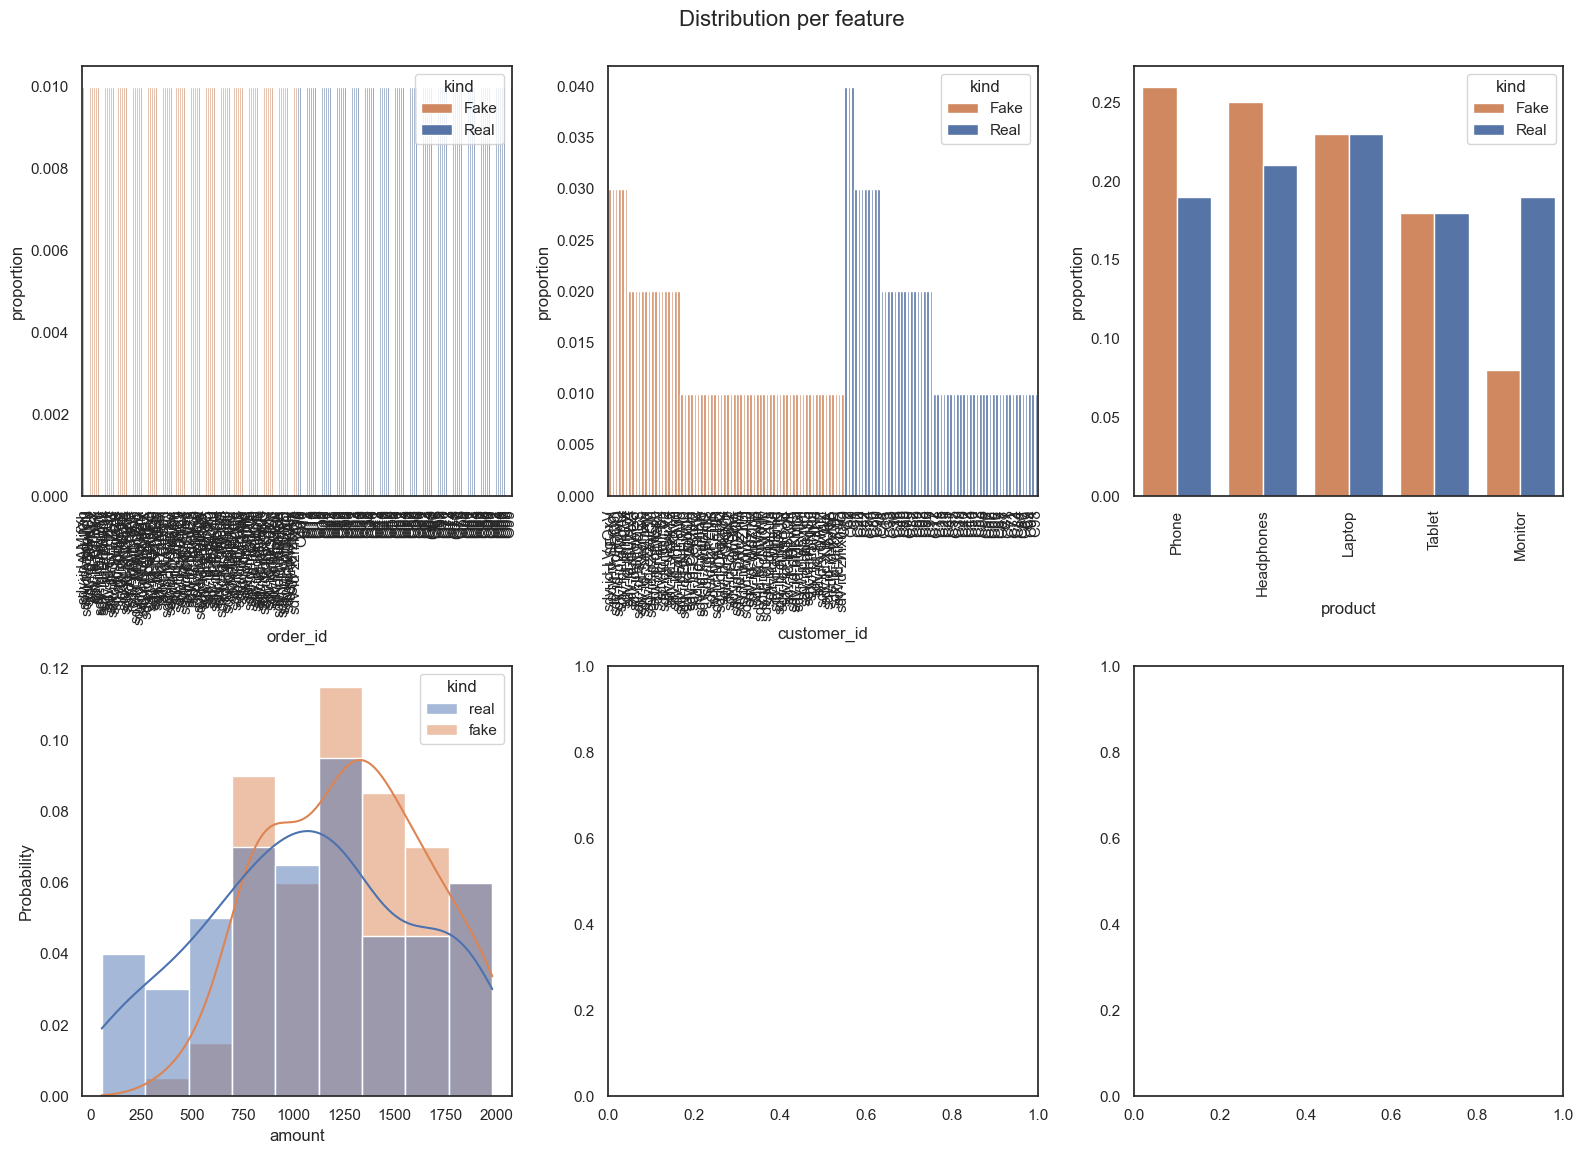

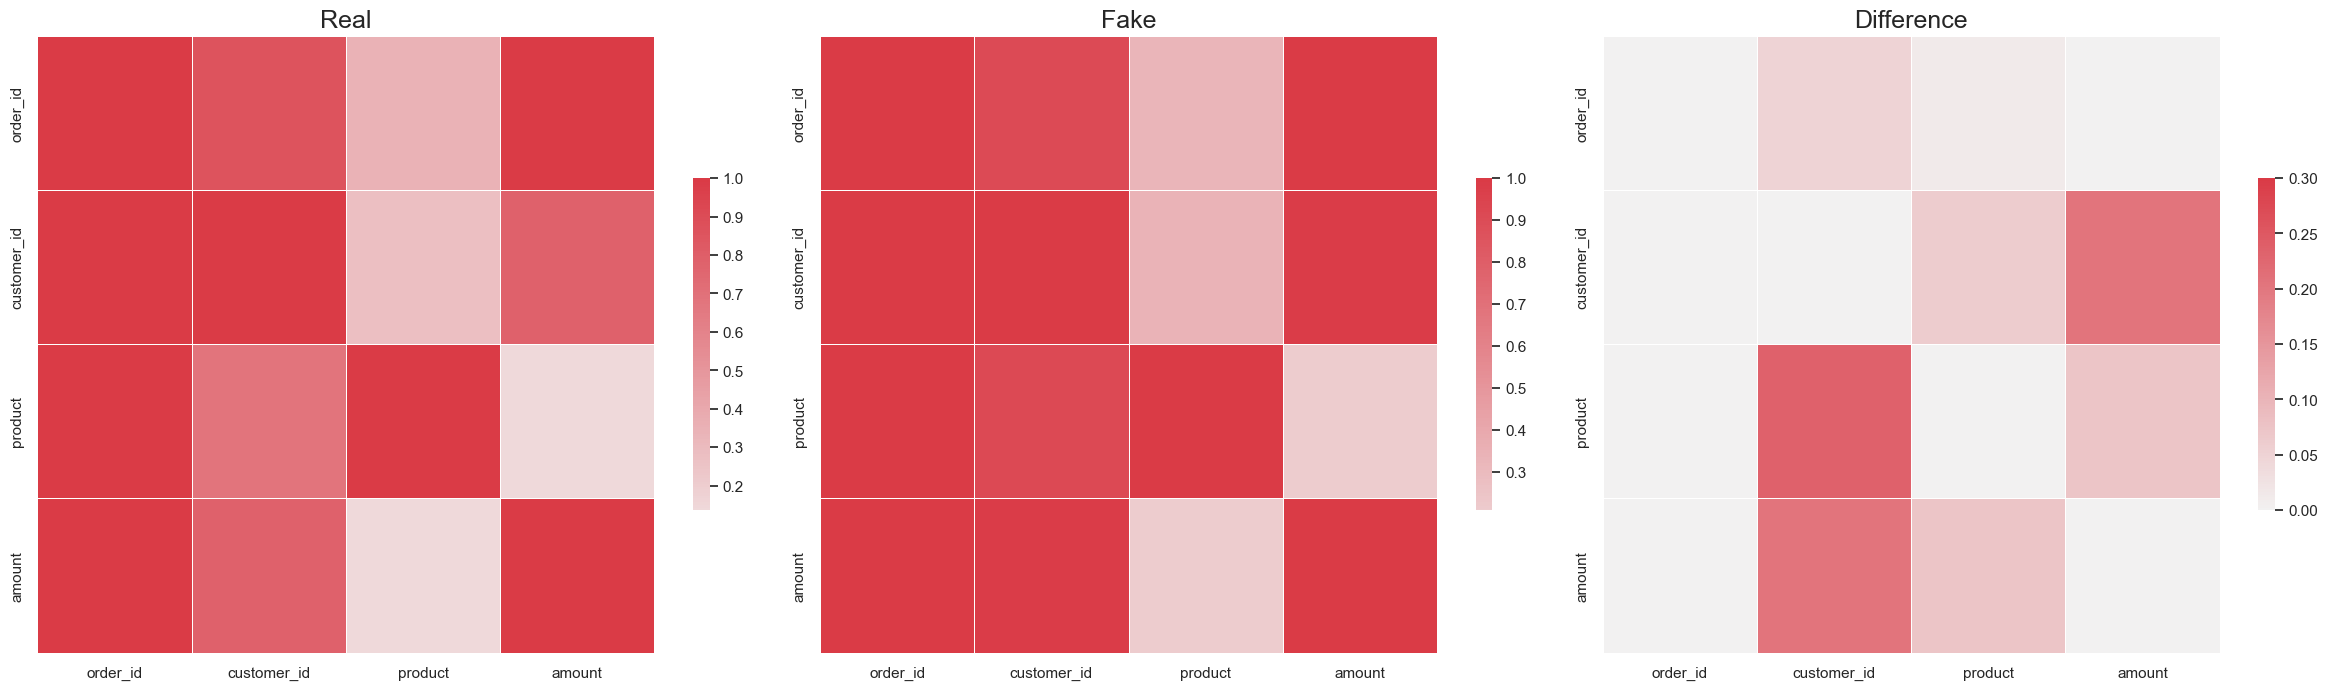

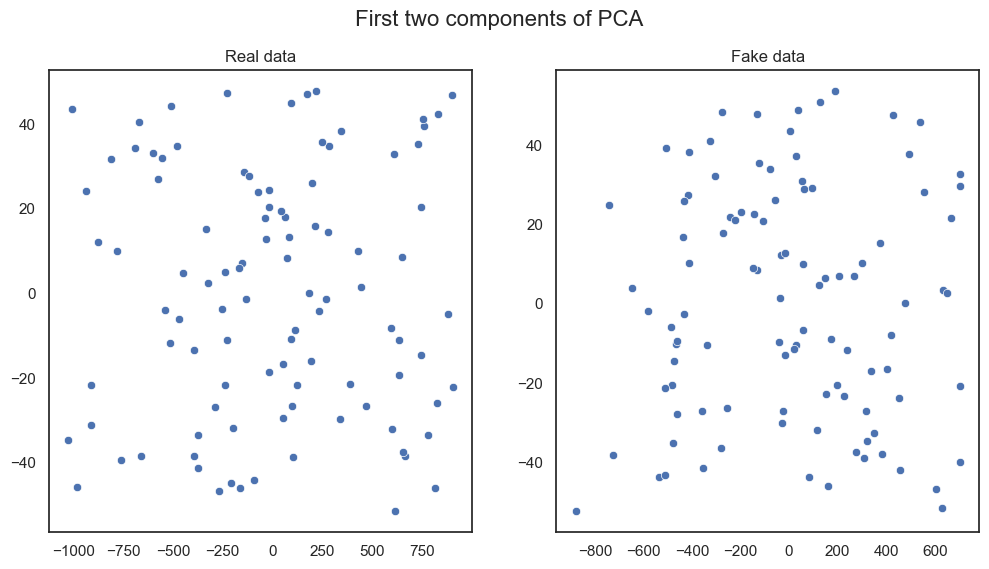

/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[                             f1_real  f1_fake  jaccard_similarity
index                                                            
LogisticRegression_real       0.0500   0.0000              0.0000
LogisticRegression_fake       0.0500   0.0000              0.0000
RandomForestClassifier_real   0.0000   0.0000              0.0000
RandomForestClassifier_fake   0.0000   0.0000              0.0000
DecisionTreeClassifier_real   0.0500   0.0000              0.0000
DecisionTreeClassifier_fake   0.0000   0.0000              0.0000
MLPClassifier_real            0.0000   0.0000              0.0256
MLPClassifier_fake            0.0000   0.0000              0.0256]


/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/metrics.py:51: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))


IPython not installed.

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0000   0.0000              0.0000
DecisionTreeClassifier_real   0.0500   0.0000              0.0000
LogisticRegression_fake       0.0500   0.0000              0.0000
LogisticRegression_real       0.0500   0.0000              0.0000
MLPClassifier_fake            0.0000   0.0000              0.0256
MLPClassifier_real            0.0000   0.0000              0.0256
RandomForestClassifier_fake   0.0000   0.0000              0.0000
RandomForestClassifier_real   0.0000   0.0000              0.0000

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.7650
nearest neighbor std                     0.1565

Miscellaneous results:
                            

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 519.80it/s]

Profiling reports saved: real_data_Orders.html, synthetic_data_Orders.html

--- Evaluating Customers ---

TableEvaluator Results:


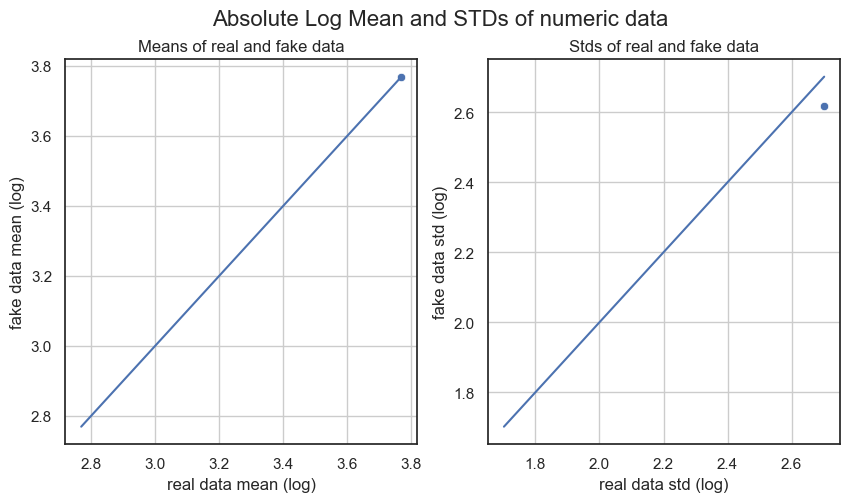

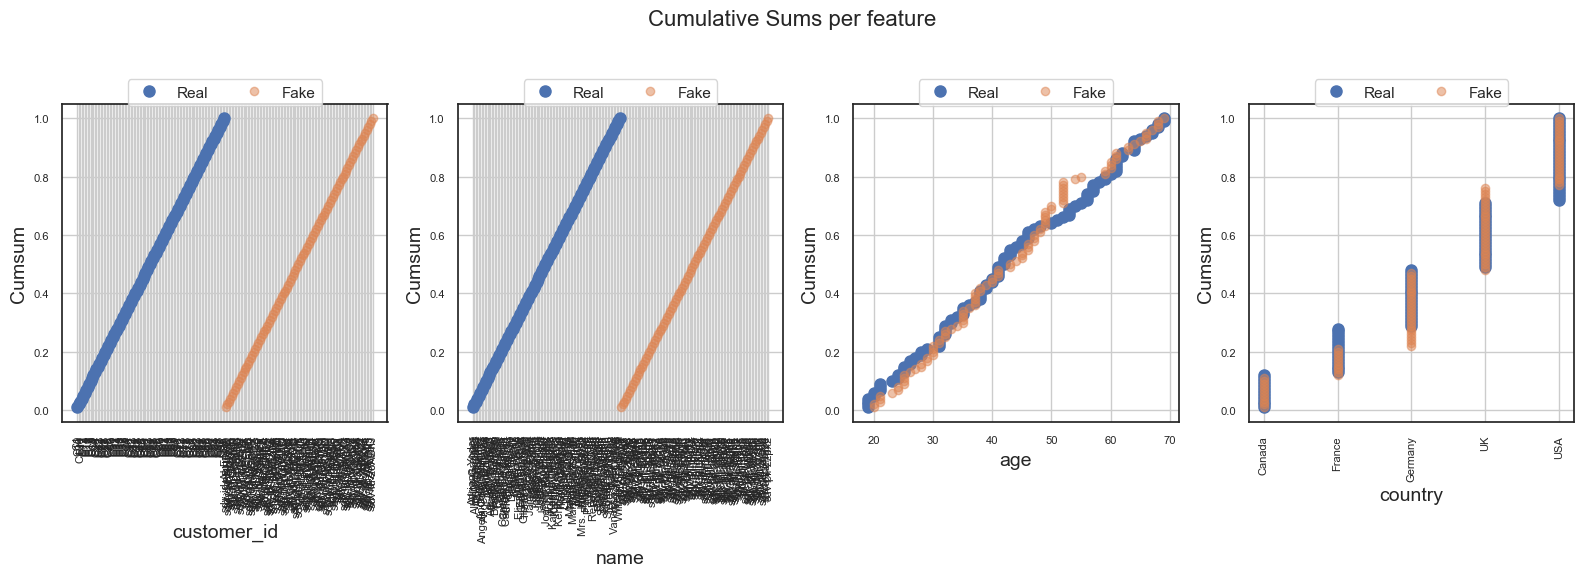

/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


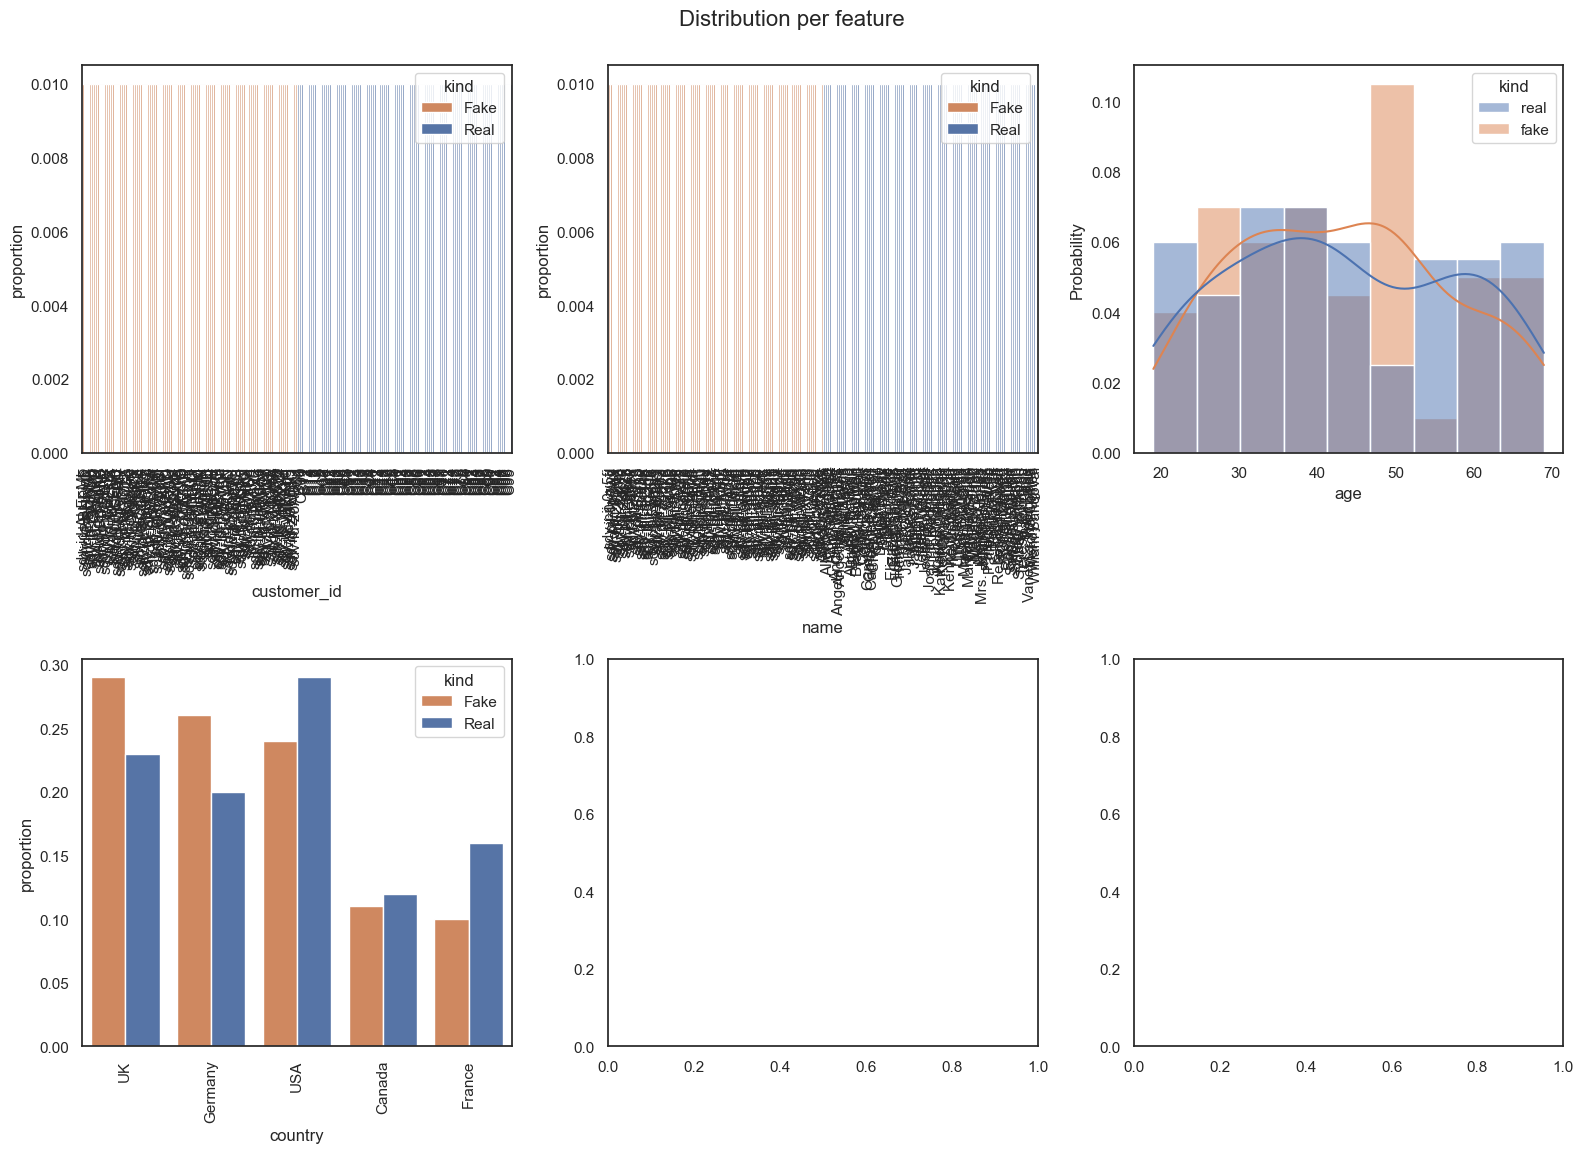

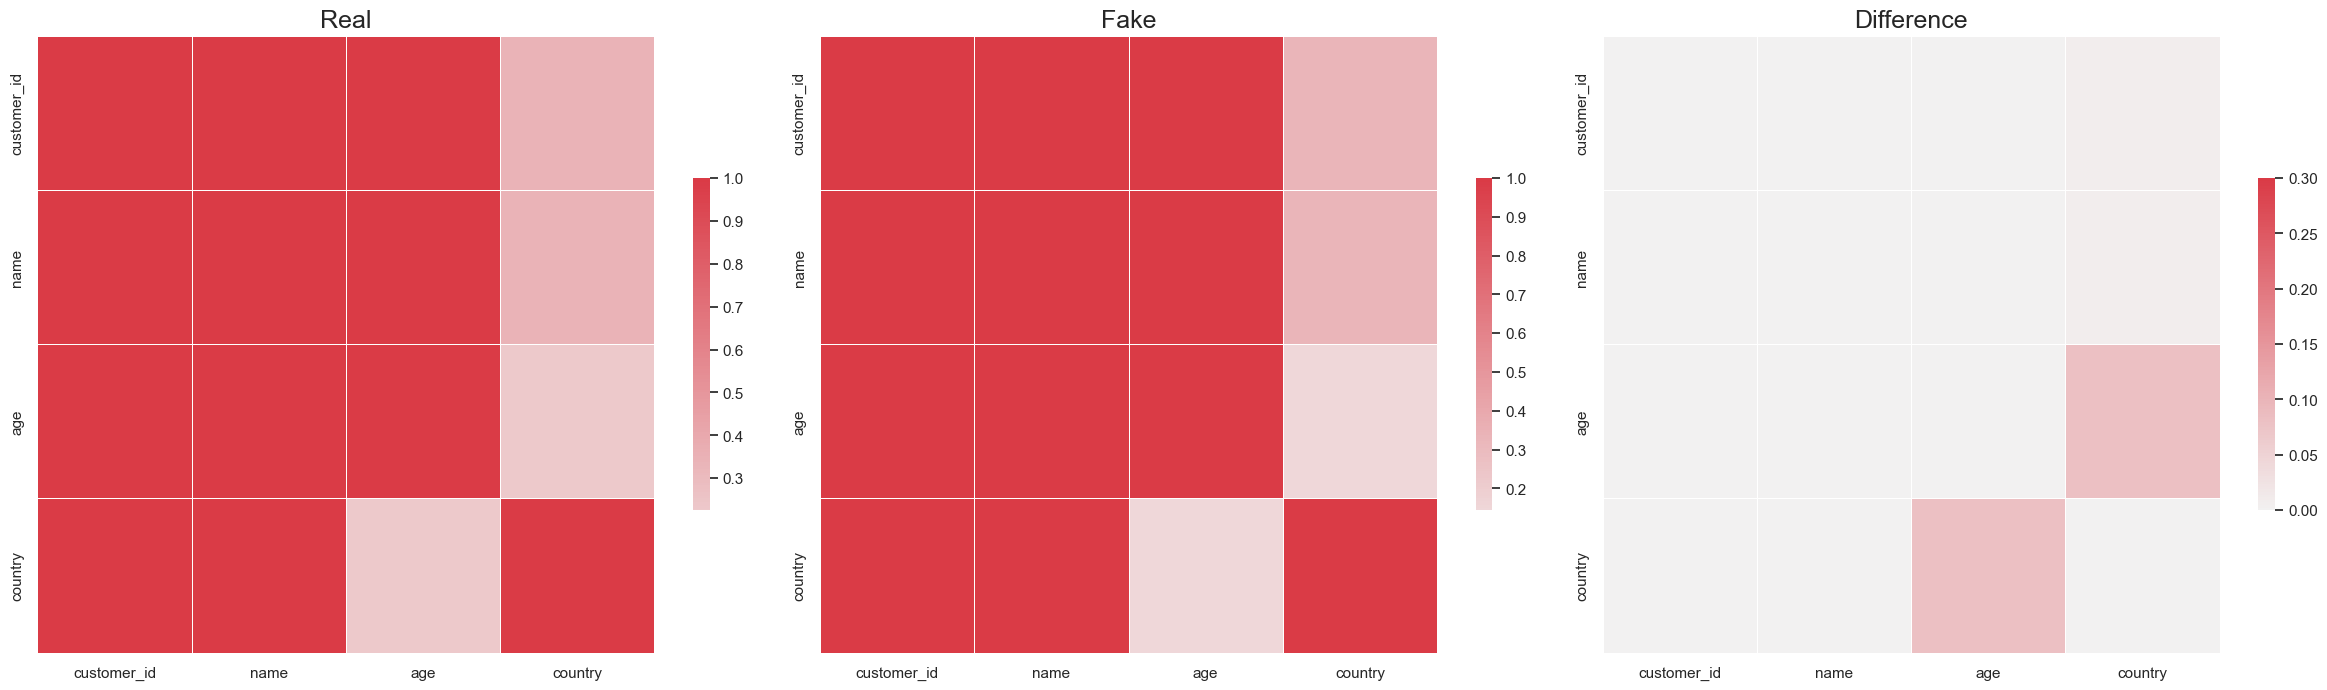

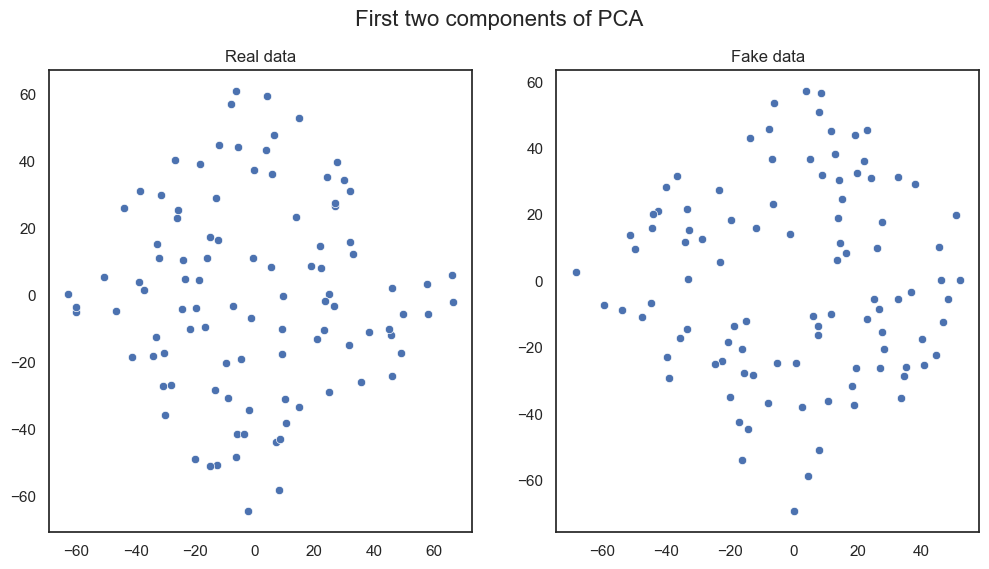

/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[                             f1_real  f1_fake  jaccard_similarity
index                                                            
LogisticRegression_real       0.0000   0.0000              0.0256
LogisticRegression_fake       0.0500   0.0000              0.0000
RandomForestClassifier_real   0.0000   0.0000              0.0000
RandomForestClassifier_fake   0.0000   0.0000              0.0000
DecisionTreeClassifier_real   0.0000   0.0500              0.0000
DecisionTreeClassifier_fake   0.0000   0.0000              0.0000
MLPClassifier_real            0.0000   0.0000              0.0000
MLPClassifier_fake            0.0000   0.0000              0.0256]

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0000   0.0000              0.0000
DecisionTreeClassifier_real   0.0000   0.0500              0.0000
LogisticRegression_

/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/metrics.py:51: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
/Users/apple/Documents/Priyesh/synth_gen_3.11.6_venv/lib/python3.11/site-packages/table_evaluator/metrics.py:51: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 913.39it/s]

Profiling reports saved: real_data_Customers.html, synthetic_data_Customers.html

--- Evaluating Payments ---

TableEvaluator Results:


ValueError: min() arg is an empty sequence

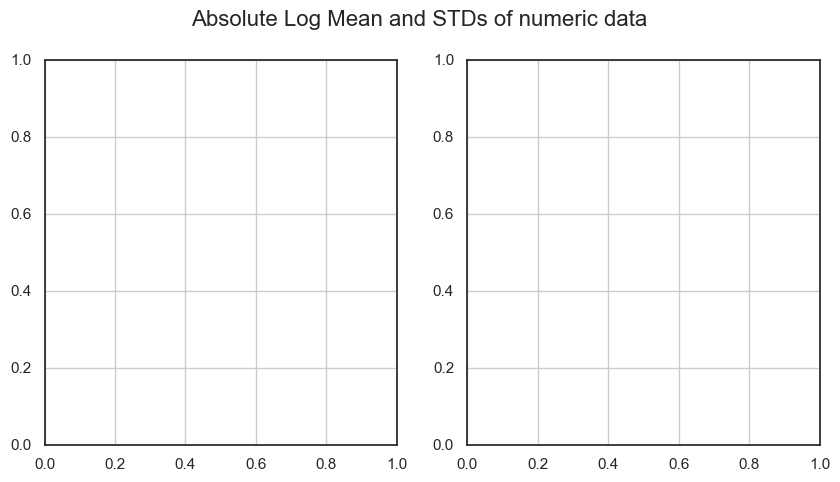

In [12]:
# Step 6: Run Evaluations
evaluate_synthetic_data(orders, synthetic_data["orders"], metadata, dataset_name="Orders")
evaluate_synthetic_data(customers, synthetic_data["customers"], metadata, dataset_name="Customers")
evaluate_synthetic_data(payments, synthetic_data["payments"], metadata, dataset_name="Payments")